In [ ]:
# 파일 및 라이브러리 불러오기

# **ipynb 단축키**
## 셀 추가 및 삭제
1. esc+b : 아래로 셀추가
2. esc+a : 위로 셀추가
3. esc + d+d 셀 삭제

## 마크다운, 코드셀 
4. esc+m : 마크다운으로 변경
5. esc+y :코드셀로 변경

## 셀 실행
6. shift + enter : 셀 실행 후 아래로 이동
7. cntrl + enter : 셀 실행

In [1]:
import numpy as np                  # 수치 계산/벡터·행렬 연산(NumPy)
import pandas as pd                 # 데이터프레임 생성·가공·요약(Pandas)

import matplotlib.pyplot as plt     # 기본 시각화 라이브러리(Matplotlib)
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정(그래프에서 한글 깨짐 방지)

!pip install koreanize-matplotlib   
import koreanize_matplotlib         # Matplotlib 한글 폰트/마이너스 기호 등 자동 설정

from IPython.display import display # 노트북에서 DataFrame 등을 예쁘게 출력할 때 사용

import seaborn as sns               # 통계 시각화(분포/관계/범주형 비교) 라이브러리(Seaborn)

Matplotlib is building the font cache; this may take a moment.


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   --------- ------------------------------ 1.8/7.9 MB 37.6 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/7.9 MB 40.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/7.9 MB 40.4 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 13.8 MB/s  0:00:00


In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 데이터 불러오고 대략적으로 둘러보기

 - data.head(n) : 위에서 n행 보기(기본 5행)
 - data.tail(n) : 아래에서 n행 보기(기본 5행)
 - data.info() : 컬럼별 자료형(dtype), 결측치 개수, 메모리 사용량 요약
 - data.describe() : 수치형 변수 요약 통계(개수/평균/표준편차/사분위수 등)
 - data.describe(include="all") : 범주형까지 포함해 요약(결측/유니크/최빈값 등)

 - data.shape : (행, 열) 크기
 - data.columns : 컬럼 이름 목록
 - data.dtypes : 컬럼별 자료형
 - data.isna().sum() : 컬럼별 결측치 개수
 - data.nunique() : 컬럼별 유니크 값 개수(범주형 점검에 유용)


In [6]:
data.head(5) #앞에 5개 행 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail(5) #뒤에 5개 행 추출

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.info() #결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe(include="all") #기술통계량 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data.shape # 행,열 개수

(891, 12)

In [9]:
data.columns # 변수들 보기

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.dtypes # 변수 type

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
data.nunique() # 고유값 개수 확인 -> 범주형일지 유추

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.isnull().sum().sort_values() #결측치 개수 오름차순 정렬

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

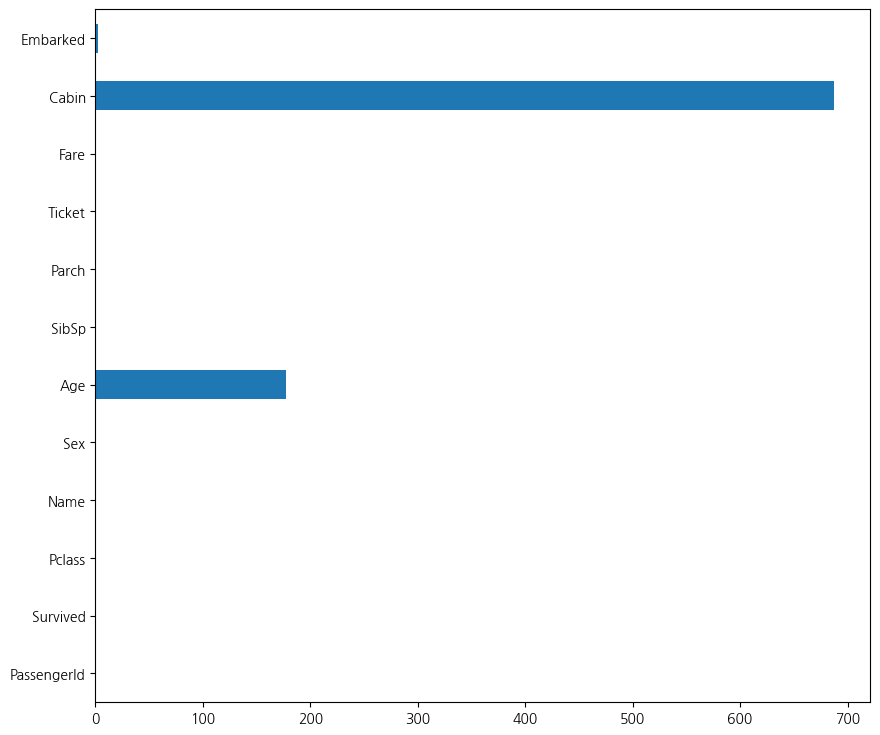

In [14]:
## 결측치 시각화 (only 가독성있게 결측치를 확인하기 위해서)
data.isnull().sum().plot.barh(figsize=(10, 9))

In [15]:
# 모든 변수가 다 NA인 행
data.isnull().all(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [16]:
# 모든 변수가 다 NA인 행 개수
data.isna().all(axis=1).sum()

0

# 변수별 EDA
- value.count() : 고유값들의 개수
- value_counts(normalize = True) : 고유값들의 비율
- piechart(): 원그래프 
- describe() : 요약통계량 제공
- boxplot(): 박스플롯
- hist(): 히스토그램

## passenger id
- 제거

In [25]:
data1 = data.drop(columns=["PassengerId"]).copy()
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
# 변수명 확인
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Survived
 - 1: 생존, 0: 사망
 - 숫자형으로 되어있지만 범주형임

In [19]:
data1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
data1["Survived"].value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: title={'center': 'Survived'}, xlabel='Survived'>

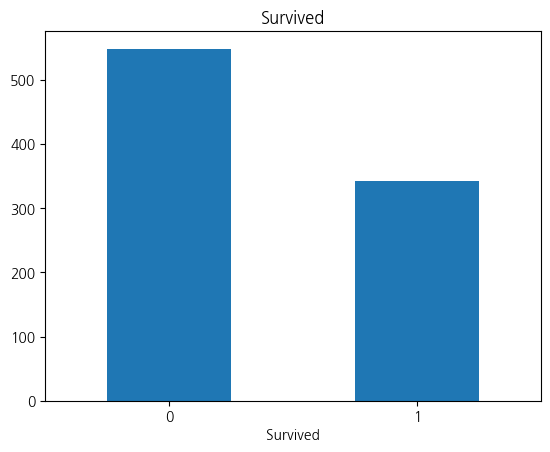

In [21]:
data1["Survived"].value_counts().plot(kind="bar",rot=0, title="Survived")

Survived
0    549
1    342
Name: count, dtype: int64


Text(0.5, 1.0, 'Survival Rate (Pie)')

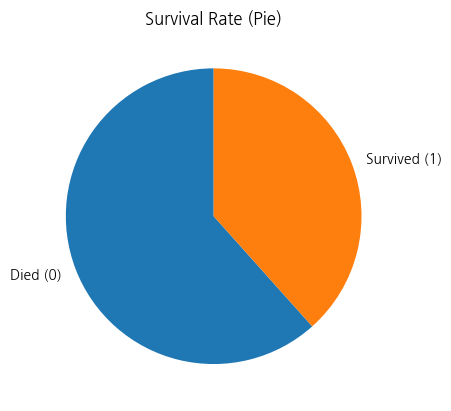

In [22]:
counts = data1["Survived"].value_counts().sort_index()  # 범주별 count한 통계량 먼저 만들기
print(counts)
plt.pie(
    counts.values,
    labels=["Died (0)", "Survived (1)"],
    startangle=90
)
plt.title("Survival Rate (Pie)")

## Pclass


In [38]:
counts = data1["Pclass"].value_counts().sort_index()
print(counts)

Pclass
1    216
2    184
3    491
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='Survived'>

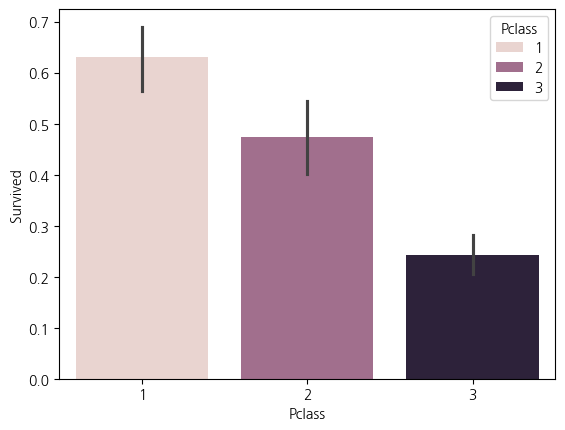

In [39]:
sns.barplot(x="Pclass",y="Survived",data=data1,hue="Pclass")

## SEX

In [41]:
counts = data1["Sex"].value_counts().sort_index()
print(counts)

Sex
female    314
male      577
Name: count, dtype: int64


In [42]:
data1["Sex"].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

<Axes: xlabel='Sex', ylabel='Survived'>

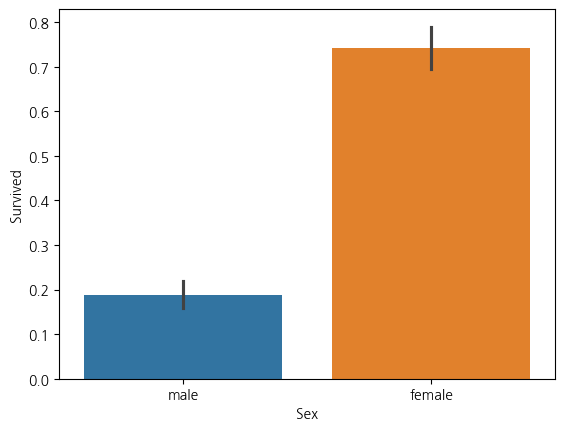

In [43]:
sns.barplot(x="Sex",y="Survived",data=data1,hue="Sex")

## AGE

In [23]:
data1["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

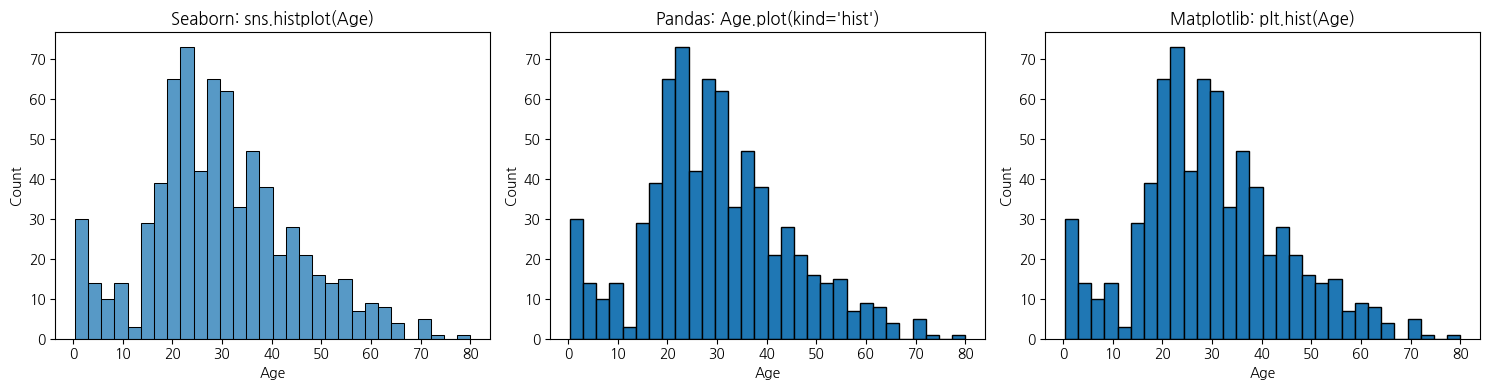

In [24]:
age = data1["Age"].dropna()
bins = 30

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) seaborn
sns.histplot(age, bins=bins, ax=axes[0])
axes[0].set_title("Seaborn: sns.histplot(Age)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# 2) pandas .plot
age.plot(kind="hist", bins=bins, edgecolor="black", ax=axes[1])
axes[1].set_title("Pandas: Age.plot(kind='hist')")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Count")

# 3) matplotlib
axes[2].hist(age, bins=bins, edgecolor="black")
axes[2].set_title("Matplotlib: plt.hist(Age)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

<Axes: ylabel='Age'>

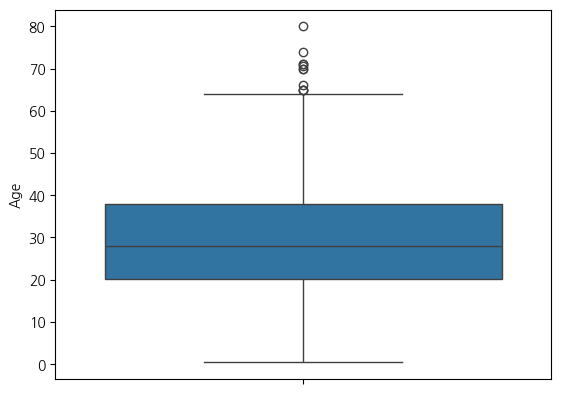

In [25]:
sns.boxplot(data1['Age'])

## 'SibSp' - 같이 탑승한 형제 또는 배우자

In [50]:
data1["SibSp"].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [56]:
counts = data1["SibSp"].value_counts().sort_index()
print(counts)

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='Survived'>

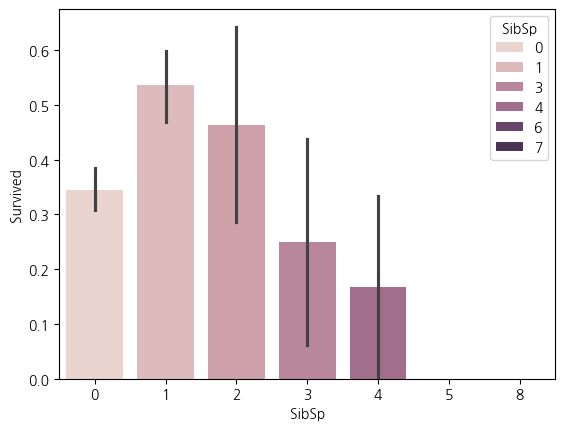

In [59]:
sns.barplot(x="SibSp",y="Survived",data=data1,hue="SibSp")

## 'Parch' - 같이 탑승한 부모 또는 자녀의 수

In [52]:
data1["Parch"].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [54]:
counts = data1["Parch"].value_counts().sort_index()
print(counts)

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: count, dtype: int64


<Axes: xlabel='Parch', ylabel='Survived'>

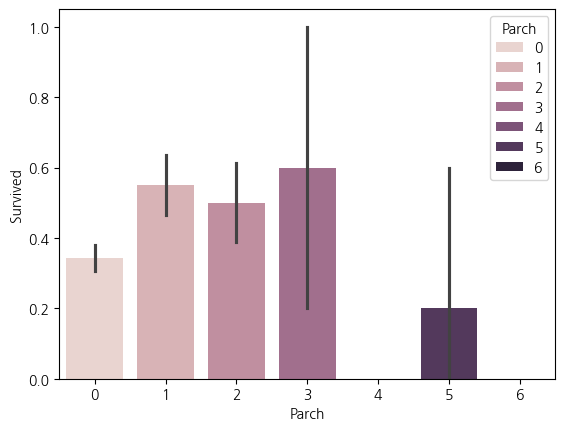

In [55]:
sns.barplot(x="Parch",y="Survived",data=data1,hue="Parch")

## 'Ticket' : 티켓

In [60]:
data1["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [61]:
counts = data1["Ticket"].value_counts().sort_index()
print(counts)

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: count, Length: 681, dtype: int64


## Fare : 요금

In [63]:
data1["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [64]:
counts = data1["Fare"].value_counts().sort_index()
print(counts)

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Name: count, Length: 248, dtype: int64


## Cabin : 객실번호

In [65]:
data1["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [66]:
counts = data1["Cabin"].value_counts().sort_index()
print(counts)

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Name: count, Length: 147, dtype: int64


<Axes: xlabel='Cabin', ylabel='Survived'>

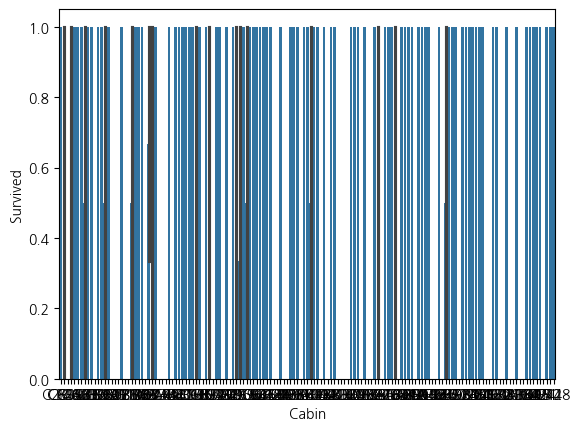

In [68]:
sns.barplot(x="Cabin",y="Survived",data=data1)

## Embarked : 탑승지

In [69]:
data1["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [71]:
counts = data1["Embarked"].value_counts().sort_index()
print(counts)

Embarked
C    168
Q     77
S    644
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='Survived'>

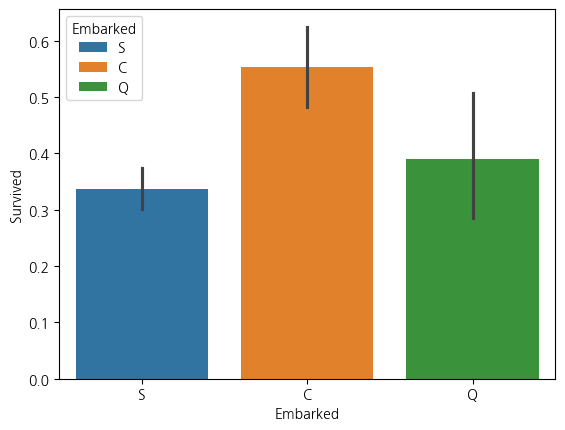

In [72]:
sns.barplot(x="Embarked",y="Survived",data=data1,hue="Embarked")

# 변수 두개 한번에 보기

## 범주형 vs 범주형 (Suarvival vs Sex)
 - crosstab() : 교차표 생성
 - heatmatp() : 히트맵 생성(crosstab()객체를 넣어야함)
 - data.groupby("범주") : 범주별로 그룹 생성

In [26]:
pd.crosstab(data1["Sex"], data1["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


Text(51.722222222222214, 0.5, 'Sex')

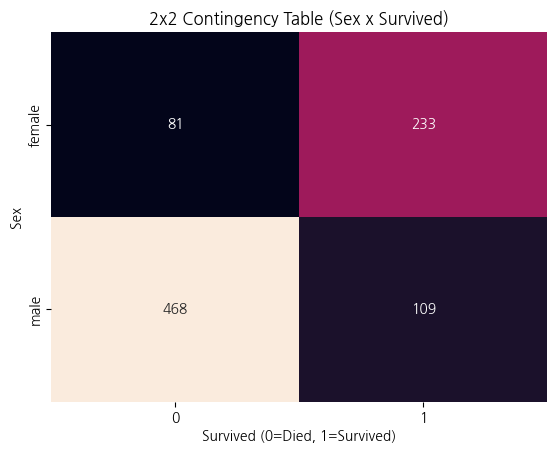

In [27]:
ct = pd.crosstab(data["Sex"], data["Survived"])
sns.heatmap(ct, annot=True, fmt="d", cbar=False)
plt.title("2x2 Contingency Table (Sex x Survived)")
plt.xlabel("Survived (0=Died, 1=Survived)")
plt.ylabel("Sex")

# 범주형 vs 연속형 예시 (Pcalss vs Age)
- groupby('범주')[ '범주에 따라 보고싶은 값' ].통계량

In [28]:
#groupby를 이용해 범주별 값 보기
data.groupby("Pclass")['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Axes(0.125,0.11;0.775x0.77)


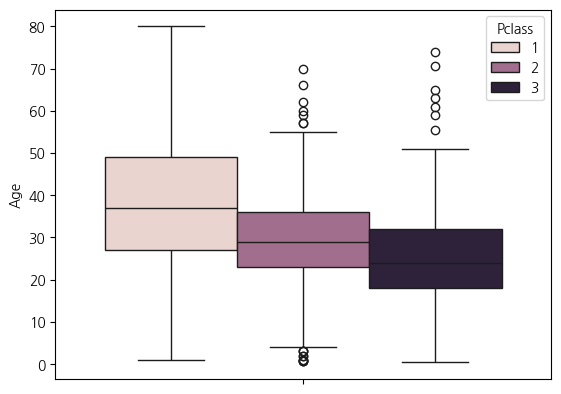

In [29]:
print(sns.boxplot(y="Age",hue="Pclass",data=data1))

<Axes: ylabel='Age'>

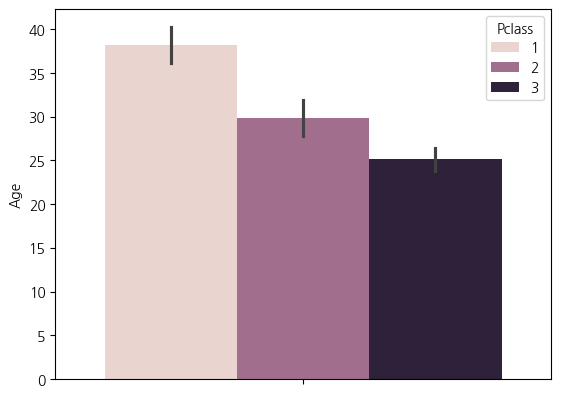

In [30]:
sns.barplot(y="Age", hue = "Pclass", data = data1)

Text(0.5, 1.0, '생존 여부에 따른 나이 ')

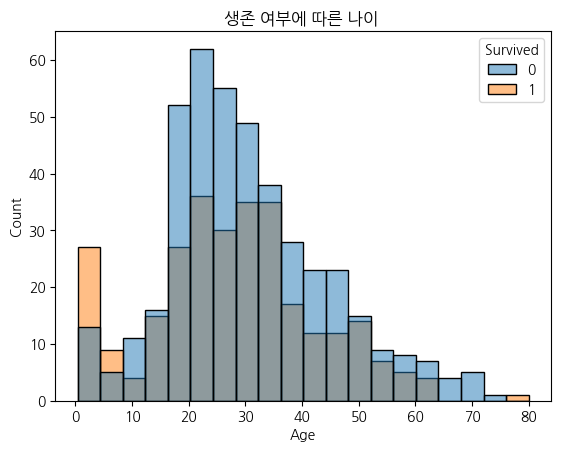

In [31]:
sns.histplot(x="Age", hue = "Survived",data = data1 )
plt.title("생존 여부에 따른 나이 ")

## **파생변수 만들기**

## **SibSp, Parch 합치기 -> family 변수 생성**

In [32]:
data1["family"]=data1["SibSp"]+data1["Parch"]

In [33]:
# 반드시 확인하기
data1[['family',"SibSp","Parch"]]

,family,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,3,1,2
889,0,0,0


# **과제**

1. 추가적으로 EDA 진행해서 '생존'과 연관된 변수 찾기 + insight 정리
   - 가설 검정, 통계분석 이용하기
2. Age 변수 결측값 채우기

In [34]:
data1.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'family'],
      dtype='object')

In [35]:
data1['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- Mr: 18세 이상 남성
- Miss : 미혼 여성
- Mrs : 기혼 여성
- Master : 13세이하 남성
- Dr : 박사, 의사 

# 과제 코드 정리

 - 성별 나이 사고위치 가족동반여부

In [76]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터에서 Cabin이 결측값이 많으므로 제외.

In [78]:
data2 = data.drop(columns=["Cabin"]).copy()
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [73]:
data2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [27]:
data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Axes(0.125,0.11;0.775x0.77)


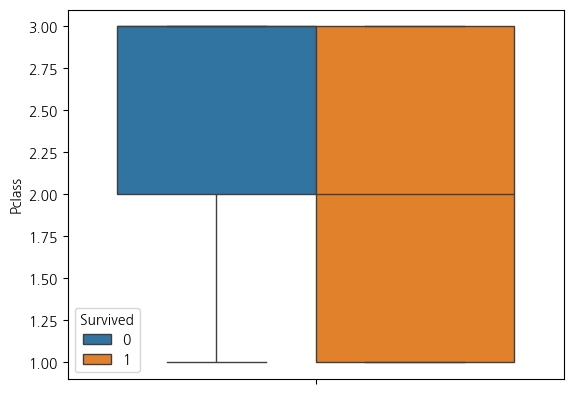

In [29]:
print(sns.boxplot(y="Pclass",hue="Survived",data=data2))

<Axes: xlabel='Pclass', ylabel='Survived'>

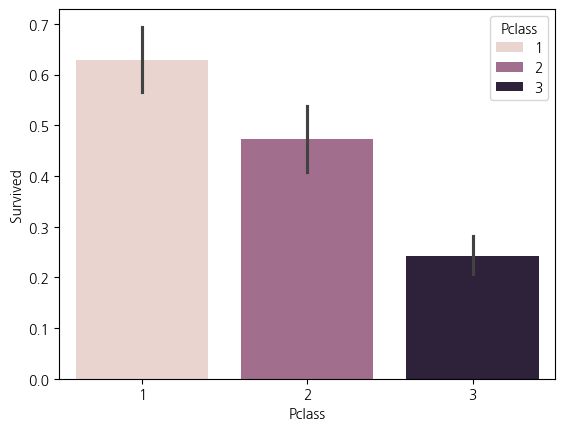

In [40]:
sns.barplot(x="Pclass",y="Survived",data=data2,hue="Pclass")

Pclass 수치가 낮을 수록 생존 확률이 높음.

Axes(0.125,0.11;0.775x0.77)


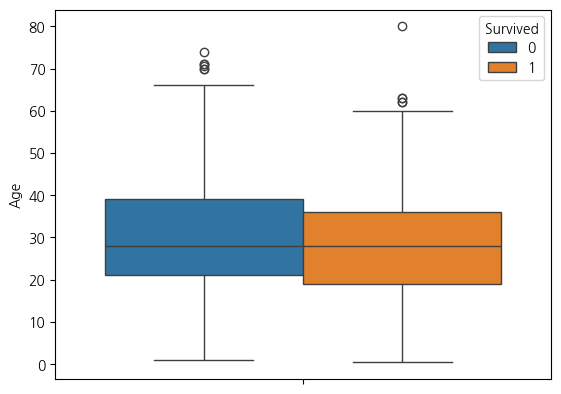

In [34]:
print(sns.boxplot(y="Age",hue="Survived",data=data2))

In [30]:
pd.crosstab(data2["Sex"], data2["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex', ylabel='Survived'>

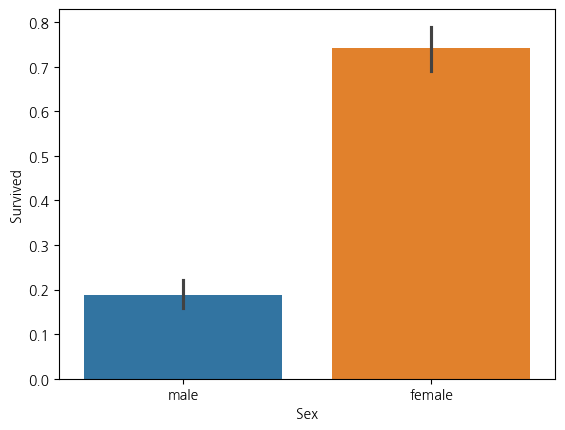

In [83]:
sns.barplot(x="Sex",y="Survived",data=data2,hue="Sex")

성별이 여성일수록 생존율이 높음.

In [84]:
data2["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: title={'center': 'Survived'}, xlabel='Survived'>

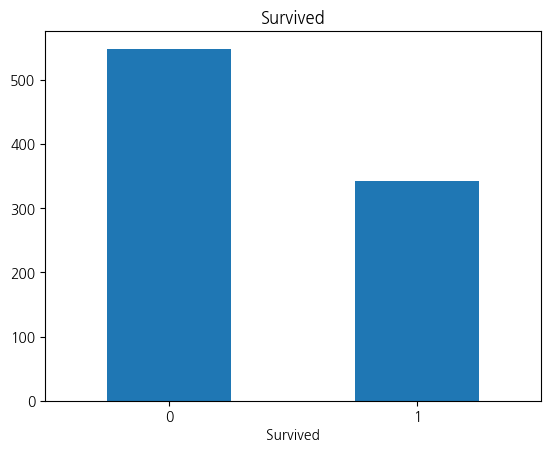

In [82]:
data2["Survived"].value_counts().plot(kind="bar",rot=0, title="Survived")

Axes(0.125,0.11;0.775x0.77)


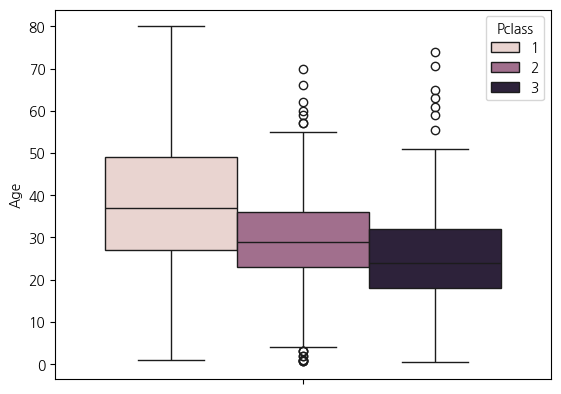

In [32]:
print(sns.boxplot(y="Age",hue="Pclass",data=data2))

data2["Name"]

In [80]:
data2["Family"]=data2["SibSp"]+data2["Parch"]
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0


<Axes: xlabel='Family', ylabel='Survived'>

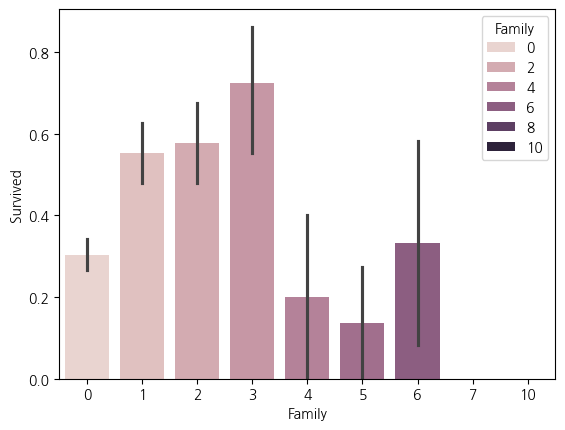

In [81]:
sns.barplot(x="Family",y="Survived",data=data2,hue="Family")

가족수가 적을수록 생존률이 높을 줄 알았으나 아님.

- 전반적으로 성별이 여성이고, Pclass 수치가 낮고 (1등석이고) 생존자의 나이대가 어릴 수록 생존률이 높다는 것을 알 수 있음.

## Age 변수 결측값 채우기

Name 변수에서 호칭(Mr, Miss, Mrs, Master, Dr)들을 추출한 뒤 호칭들 기준으로 각 그룹의 평균 연령을 계산한 뒤, 평균값으로 Age 변수의 결측값 대체 다른 호칭들은 Other로 통합.

- Mr: 18세 이상 남성
- Miss : 미혼 여성
- Mrs : 기혼 여성
- Master : 13세이하 남성
- Dr : 박사, 의사

In [89]:
data2["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [91]:
data2["Title"]=data2["Name"].str.split(",").str[1].str.split(".").str[0].str.strip()

In [92]:
data2["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [94]:
data2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [96]:
data2["Title"].nunique()

17

분석에 용의하도록 아래와 같이 바꿔주기.
- Mr -> Mr
- Miss, Mme, Ms -> Miss
- Mrs, Mme -> Mrs
- Master
- Dr, Rev, Major, Col, Capt -> Dr
- Don, Sir, Lady, Jonkheer, the Countess -> Other

In [101]:
data2["Title"]=data2["Title"].replace({
    "Mlle":"Miss",
    "Ms":"Miss",
    
    "Mme":"Mrs",

    "Rev":"Dr",
    "Major":"Dr",
    "Col":"Dr",
    "Capt":"Dr",

    "Don":"Other",
    "Sir":"Other",
    "Lady":"Other",
    "Jonkheer":"Other",
    "the Countess":"Other"
})

In [102]:
data2["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Dr'], dtype=object)

In [104]:
title_age_mean=data2.groupby("Title")["Age"].mean()
print(title_age_mean)

Title
Dr        46.705882
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Other     41.600000
Name: Age, dtype: float64


In [108]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return title_age_mean[row['Title']]
    else:
        return row['Age']

data2['Age'] = data2.apply(fill_age, axis=1)

In [110]:
data2["Age"].isnull().sum()

np.int64(0)

In [113]:
data1["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

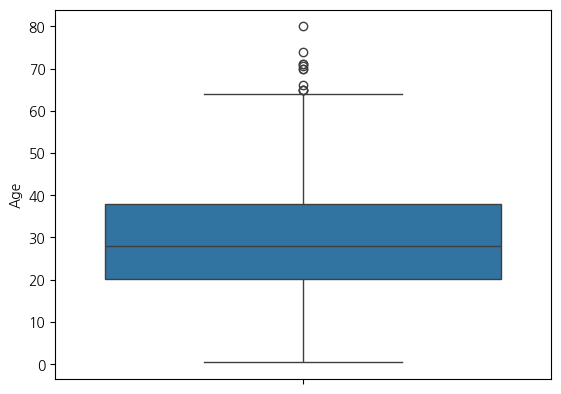

In [117]:
sns.boxplot(data1['Age'])

<Axes: xlabel='Survived', ylabel='Age'>

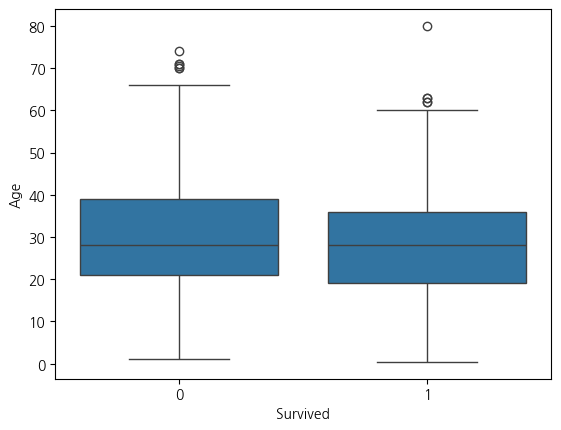

In [120]:
sns.boxplot(x="Survived",y="Age",data=data1)

In [114]:
data2["Age"].describe()

count    891.000000
mean      29.760753
std       13.280300
min        0.420000
25%       21.845638
50%       30.000000
75%       35.788991
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

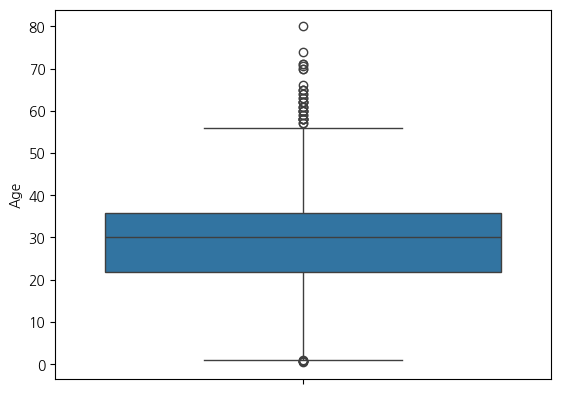

In [116]:
sns.boxplot(data2["Age"])

<Axes: xlabel='Survived', ylabel='Age'>

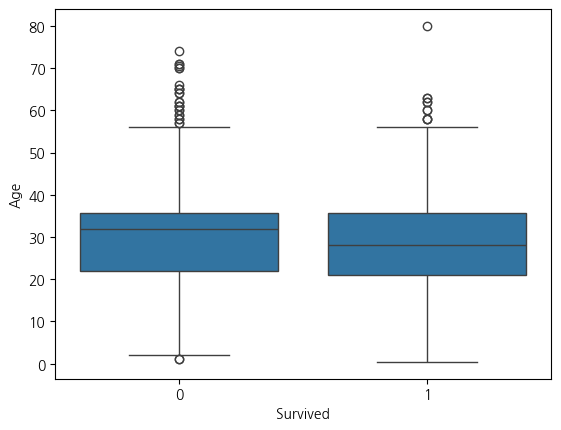

In [119]:
sns.boxplot(x="Survived",y="Age",data=data2)

출처 : https:ㅁ//www.liverpoolmuseums.org.uk/learn/resources/schools-and-groups-resources-titanic?

![타이타닉 객실 구조도](타이타닉.png)

Ai 사용 시 유의사항

1) 데이터 입력 금지  
- 데이터를 Ai에 입력한 뒤 분석을 맡기는 행위는 금지  
- **개인정보 또는 기업 내부 데이터를 ChatGPT에 입력하는 것은 절대 금지**  

2) 자료 조사·레퍼런스 확인(가능)  
- ChatGPT를 활용해 관련 자료/기사/논문/공식 문서의 링크와 출처를 요청 가능  
- 단, 반드시 원문을 직접 확인하고 필요한 내용은 검증 후 사용  

3) 코딩 지원(적극 활용 권장)  
- 코드 작성/디버깅/리팩토링 등은 적극적으로 활용  
- 단, ChatGPT가 제시한 코드는 그대로 복붙하지 말고, 원리를 이해한 뒤 실행하고 결과를 검증
